In [38]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [51]:
experiments_number = 1000
windows_number = [100, 500, 1000, 1500, 2000]
alphas = [0.1, 0.25, 0.5, 1, 2, 5]

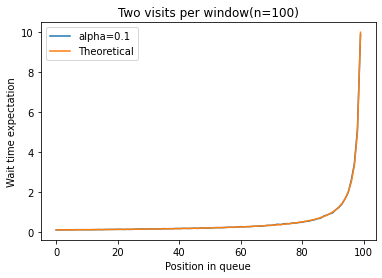

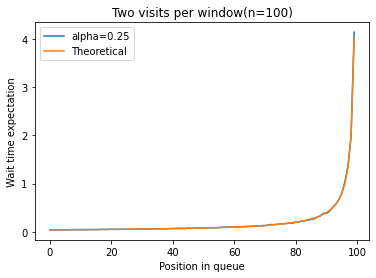

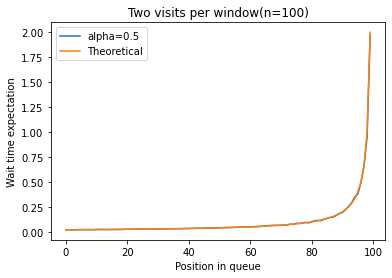

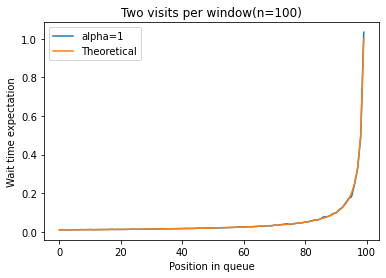

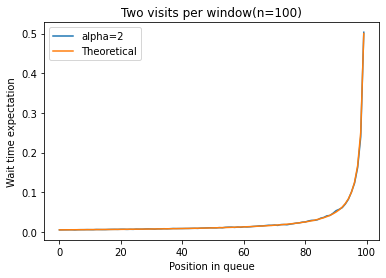

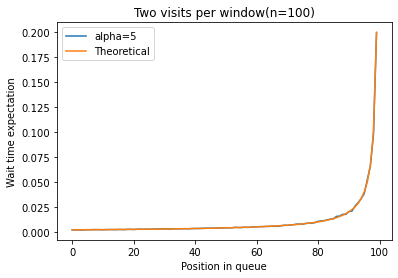

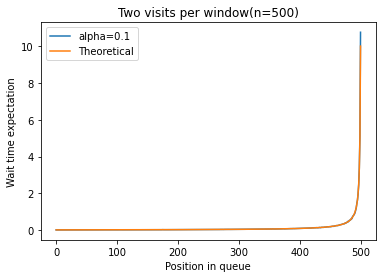

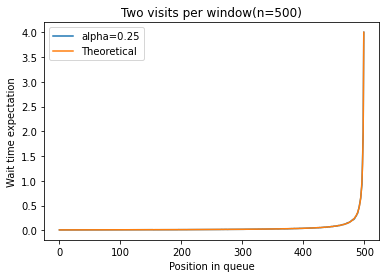

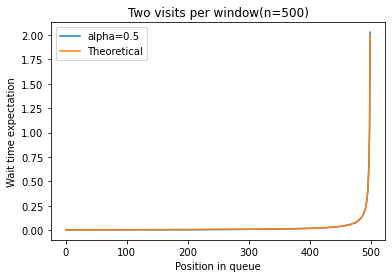

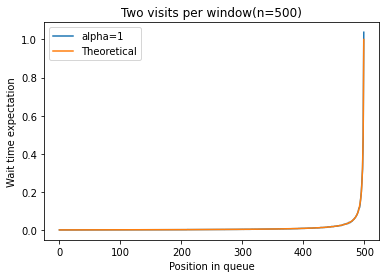

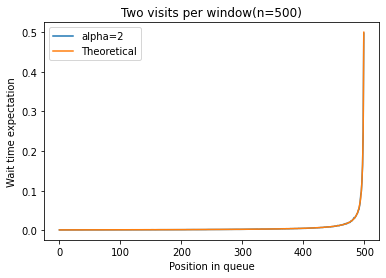

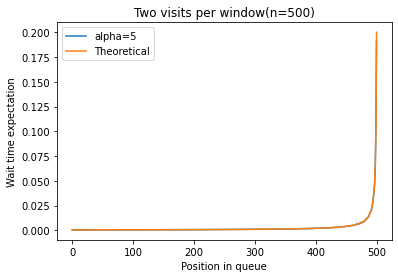

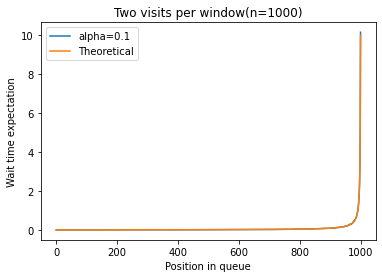

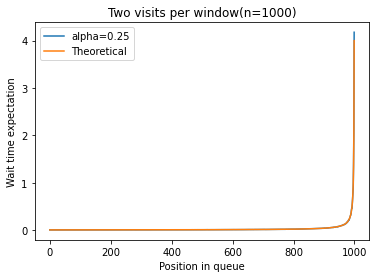

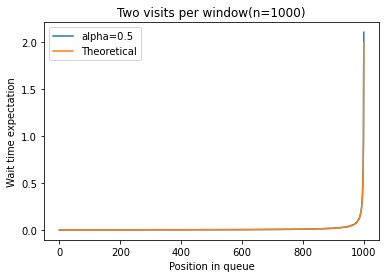

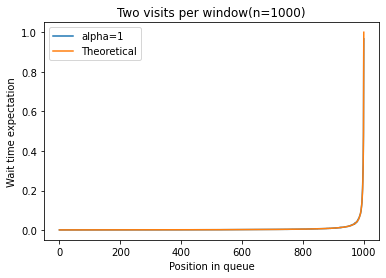

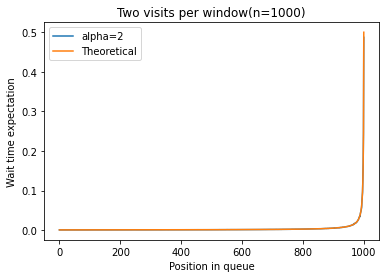

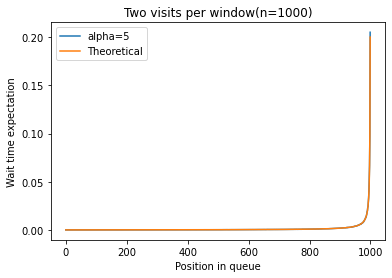

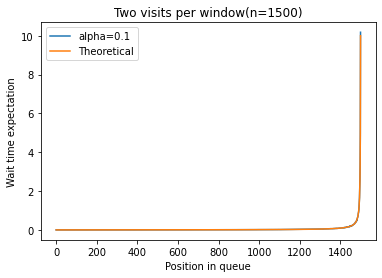

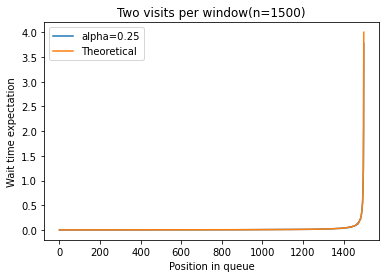

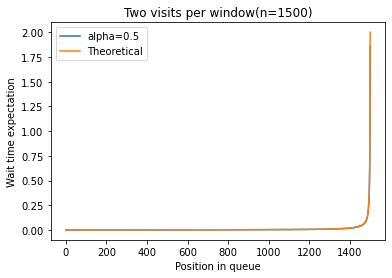

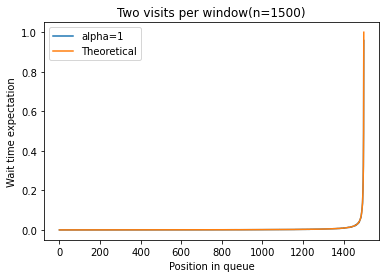

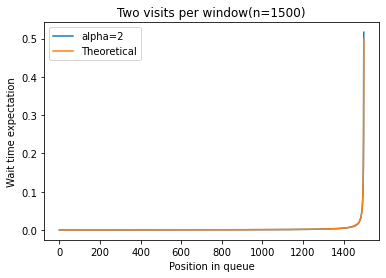

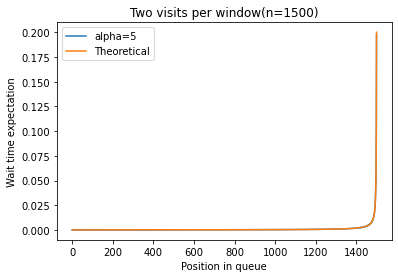

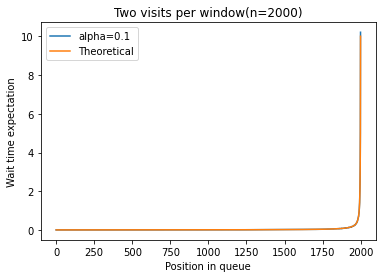

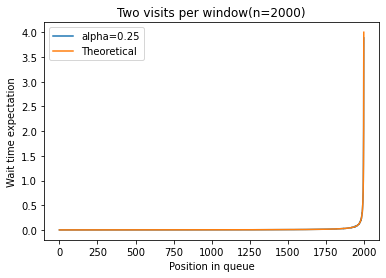

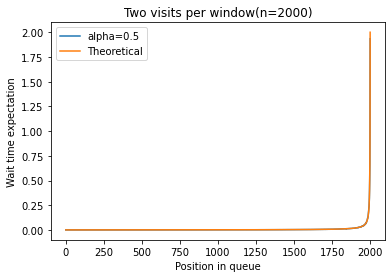

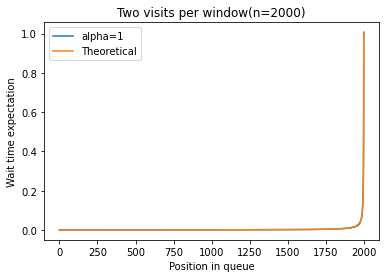

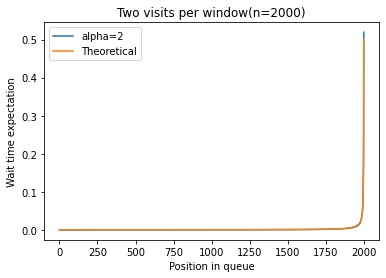

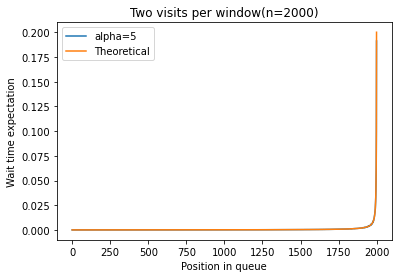

In [40]:
def first_experiment_run(n: int, alpha: float, exps: int):
    result = np.zeros(n)
    for i in range(exps):
        result += np.sort(np.random.exponential(1 / alpha, n))
    return result / exps

def first_experiment(ns_list: list, alphas_list: list, exps: int):
    labels = []
    for n in ns_list:
        x = np.arange(n)
        for alpha in alphas_list:
            y = first_experiment_run(n, alpha, exps)
            plt.plot(x, ([y[0]] + [(y[i] - y[i - 1]) for i in range(1, n)]))
            plt.plot(x, [1 / (alpha * (n - i)) for i in range(n)])
            labels = []
            labels.append("alpha={}".format(alpha))
            labels.append("Theoretical")
            plt.xlabel("Position in queue")
            plt.ylabel("Wait time expectation")
            plt.title("Two visits per window(n={})".format(n))
            plt.legend(labels)
            plt.show()
first_experiment(windows_number, alphas, experiments_number)

Вывод: результат совпал с тем что был получен теоретически для рапределения X_(k+1)-X_(k) на практике. И поэтому время растет экспоненциально.

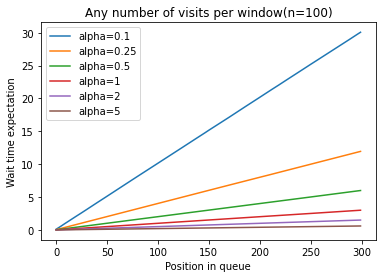

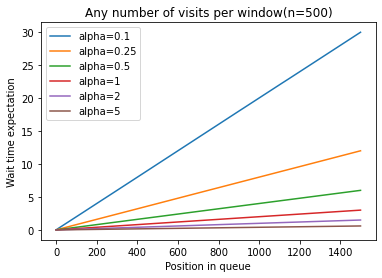

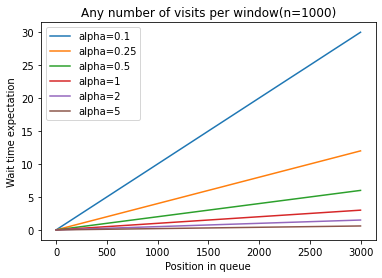

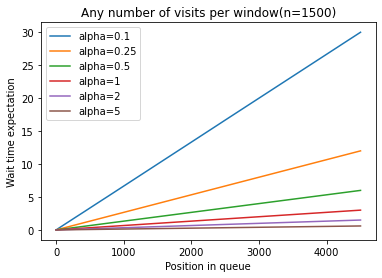

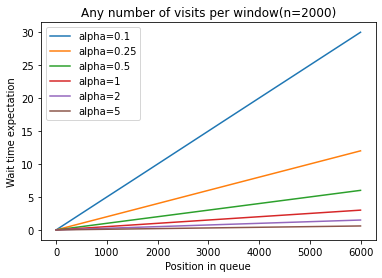

In [52]:
def gen_values(n: int, people: int, alpha: float):
    values = list(np.sort(np.random.exponential(1 / alpha, n)))
    heapq.heapify(values)
    result = np.zeros(people)
    for i in range(result.size):
        result[i] = heapq.heappop(values)
        heapq.heappush(values, np.random.exponential(1 / alpha) + result[i])
    return result

def second_experiment_run(n: int, people: int, alpha: float, exps: int):
    result = np.zeros(people)
    for i in range(exps):
        result += gen_values(n, people, alpha)
    return result / exps
    
def second_experiment(ns_list: list, alphas_list: list, exps: int):
    peoples_list = list(map(lambda t: t * 3, ns_list))
    for n, people in zip(ns_list, peoples_list):
        labels = []
        x = np.arange(people)
        for alpha in alphas:
            y = second_experiment_run(n, people, alpha, exps)
            plt.plot(x, y)
            labels.append("alpha={}".format(alpha))
        plt.xlabel("Position in queue")
        plt.ylabel("Wait time expectation")
        plt.title("Any number of visits per window(n={})".format(n))
        plt.legend(labels)
        plt.show()
        labels.clear()
        
second_experiment(windows_number, alphas, experiments_number)

Вывод: матожидание время ожидания человека в очереди линейно зависит от его позиции. По графикам несложно змаетить что коэфф будет равен
1/(windows* alpha)